# Neural Network Learning Process

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

#### Import the `make_moons` dataset

In [2]:
x,y=sklearn.datasets.make_moons(200,noise=0.2)

#### As we can see, the output classes cannot be separated by a straight line (hence, non-linear data)

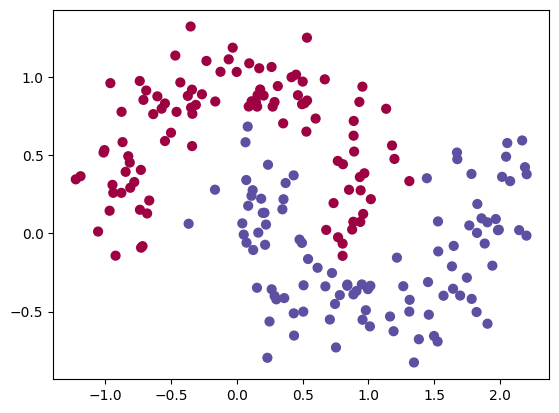

In [3]:
plt.scatter(x[:,0],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.show()

#### Convert $x$ and $y$ to torch tensors...

In [4]:
x=torch.FloatTensor(x)
y=torch.LongTensor(y)

#### Build the NN

In [5]:
class FeedForward(torch.nn.Module):
    def __init__(self,input_layer,hidden_layer,output_layer):
        super(FeedForward,self).__init__()
        self.hidden=nn.Linear(input_layer,hidden_layer)
        self.output=nn.Linear(hidden_layer,output_layer)

    def forward(self, x):
        out = self.hidden(x)
        out = F.relu(out)     # ReLu activation
        out = self.output(out)
        return out

In [6]:
network = FeedForward(input_layer = 2, hidden_layer = 50, output_layer = 2)
optimizer = torch.optim.SGD(network.parameters(), lr = 0.02)
loss_function = torch.nn.CrossEntropyLoss()  # NOT `BinaryCrossEntropyLoss()` because we have 2 output neurons

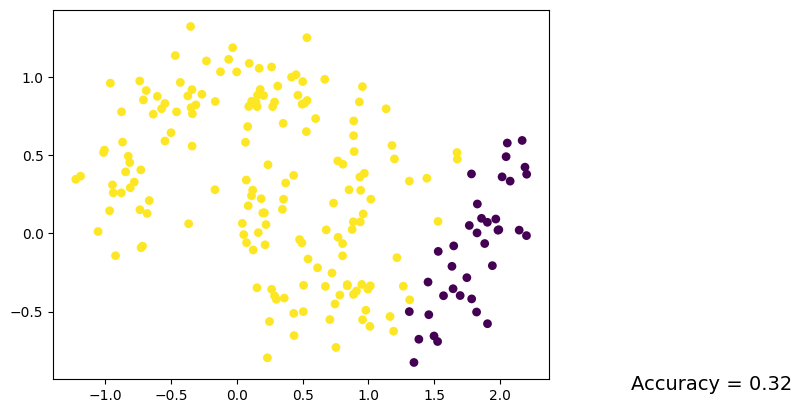

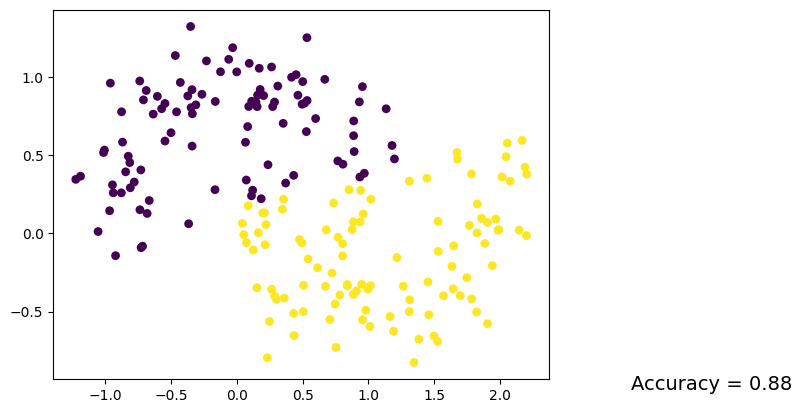

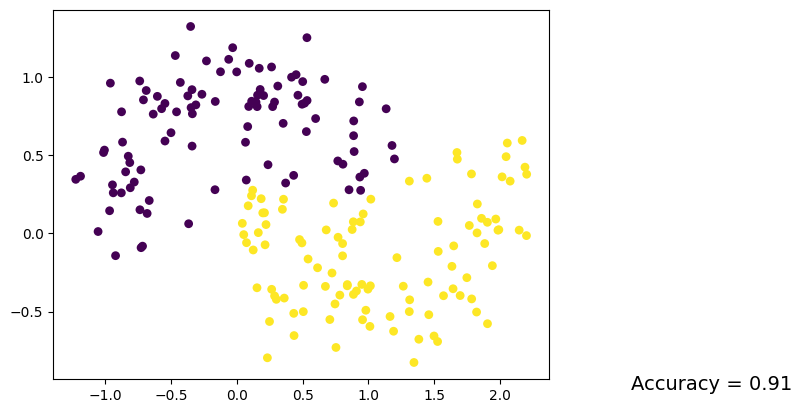

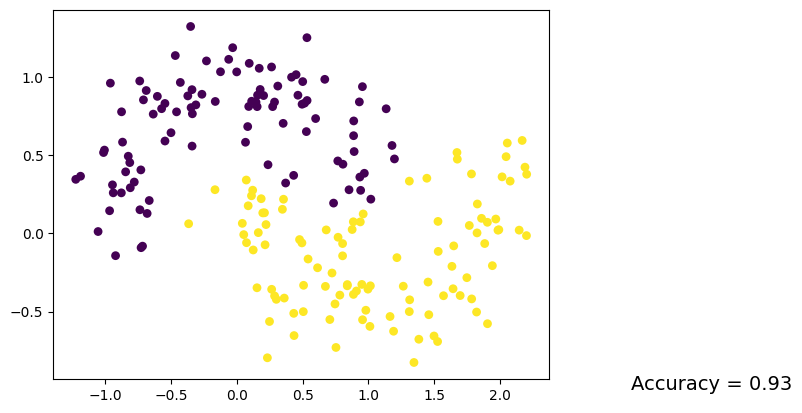

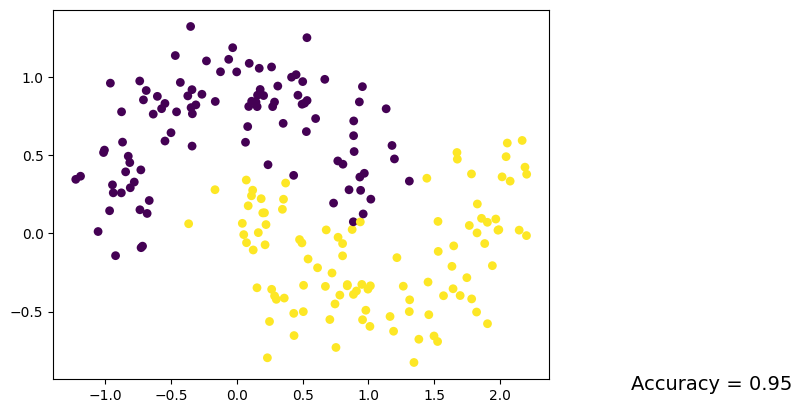

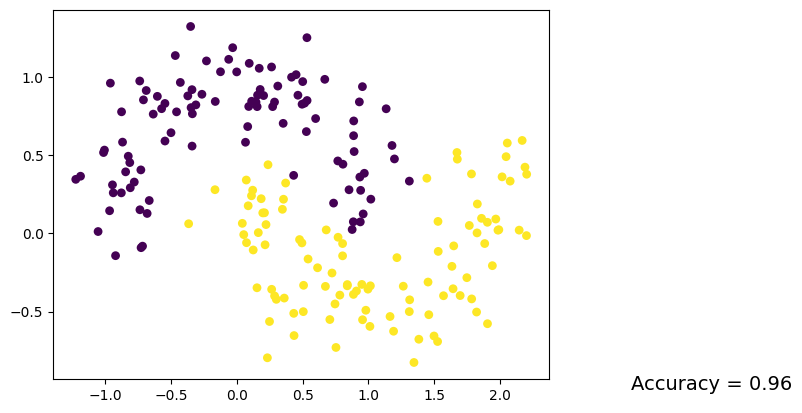

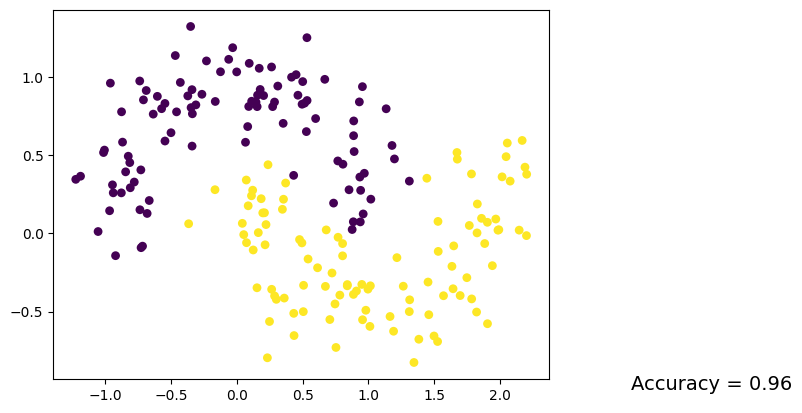

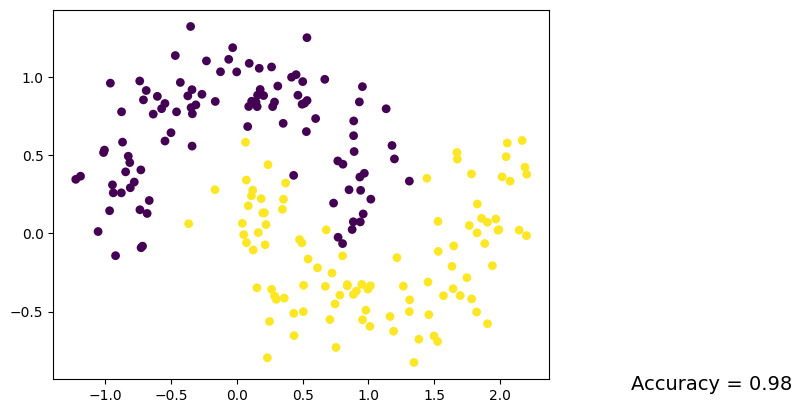

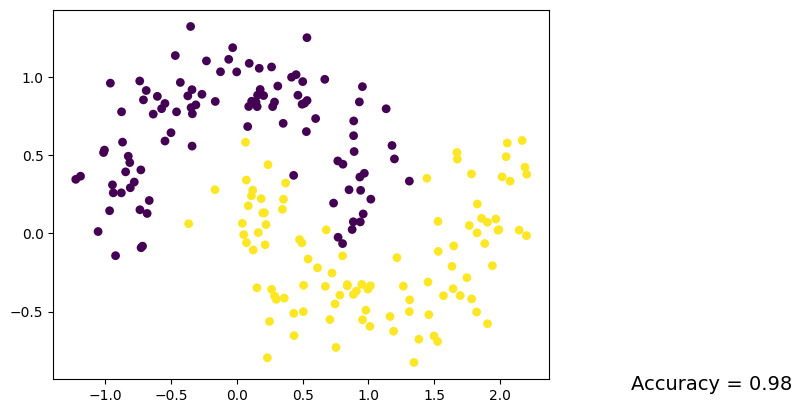

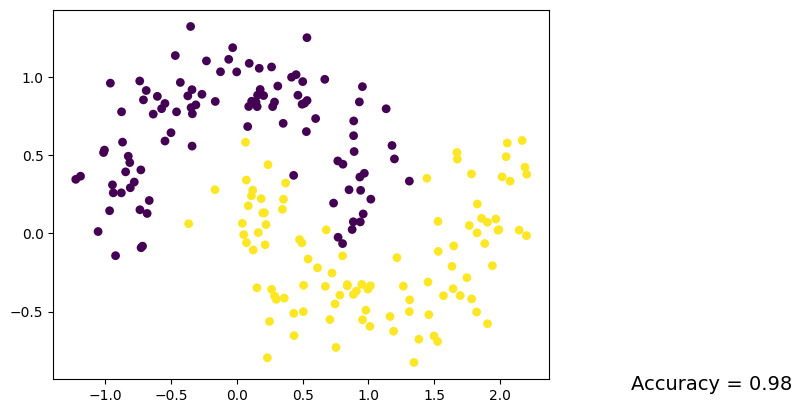

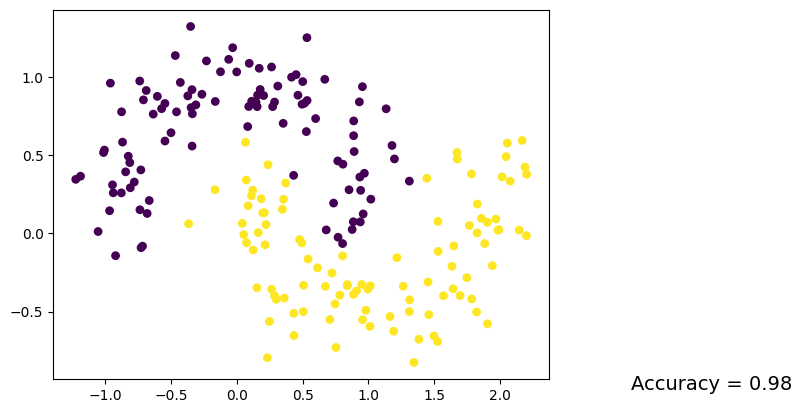

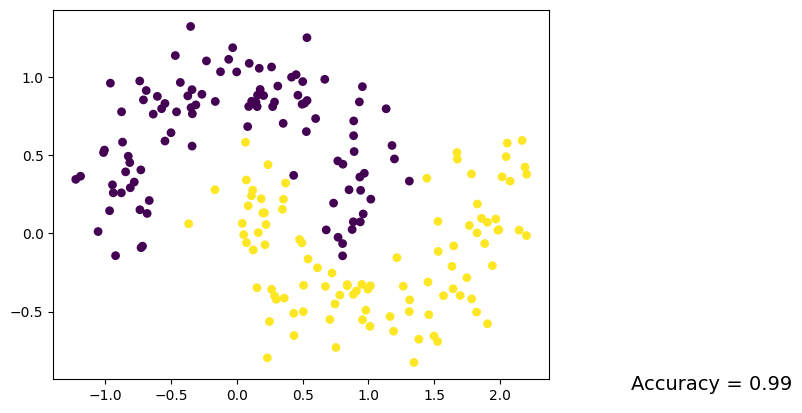

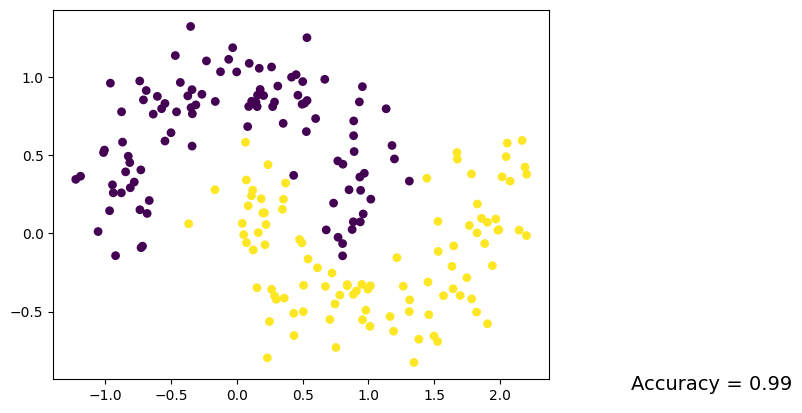

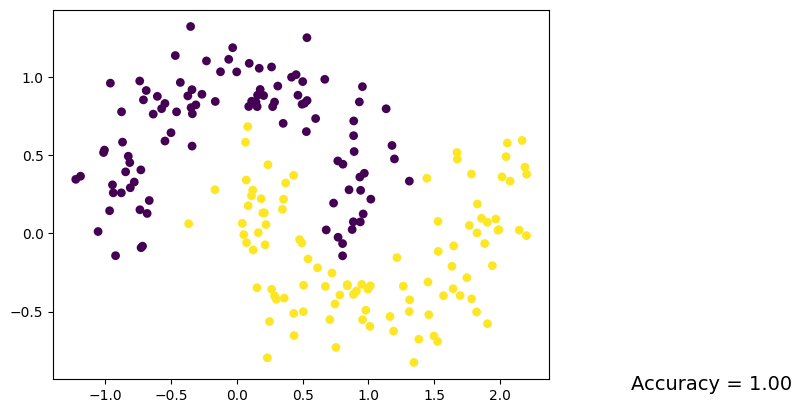

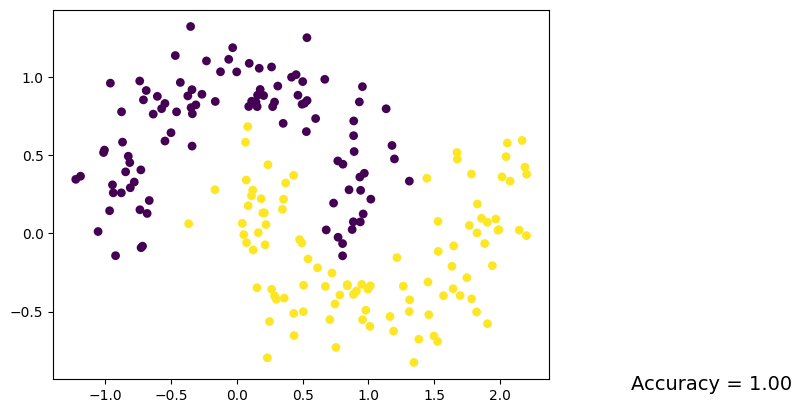

In [7]:
plt.ion()  # plot interactive mode is turned on
for epoch in range(15000):
    # out = network(x) # forward propogation
    out = network.forward(x)  # forward propogation
    loss = loss_function(out,y)  # calculate loss
    optimizer.zero_grad()   # to avoid accumulating gradients
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
         # show the learning process up until now
        max_value, prediction = torch.max(out,1)
        predicted_y = prediction.data.numpy()     # need to convert predictions from torch tensors to numpy arrays
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1], s = 40, c = predicted_y, lw = 0)
        accuracy = (predicted_y == target_y).sum() / target_y.size
        plt.text(3,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size':14})
        plt.pause(0.1)

plt.ioff()  # plot interactive mode is turned off     
plt.show()